# Inferential Statistics Application in Python - Semester 2


###  Application of Two sample T-test, Chi - test and One Way Anova on a dataset based on survey responses

In [2]:
import pandas as pd
import numpy as np
from scipy.stats  import ttest_ind,ttest_1samp,ttest_rel
import matplotlib.pyplot as plt

import researchpy as rp
from scipy import stats
import scipy
import pingouin as pg
import scipy.stats as stats
import seaborn as sns 

In [3]:
df = pd.read_excel(r"C:\Users\hp\Desktop\Fashion Industry.xlsx") 
df.head()

,Age,Occupation,Gender,Platform preferred,Frequency (shopping),Onlinebrandspurchase,Purchasedoninsta,Socmediainfluencepurchase,Givenreview,Reviewshelped,CovImpactShop,CovImpactIndustry
0,18-24,Student,Female,Nykaa Fashion,Once a month,Yes,Yes,Yes,Yes,4,4,4
1,18-24,Student,Female,Myntra,Once a month,Yes,No,No,Yes,5,4,4
2,18-24,Student,Male,Amazon,A few times a month,Yes,No,No,No,4,3,3
3,18-24,Student,Female,Nykaa Fashion,Once a month,Yes,Yes,No,Yes,4,3,3
4,18-24,Student,Female,Ajio,Once a month,Yes,No,Yes,Yes,5,2,4


## Outliers Treatment

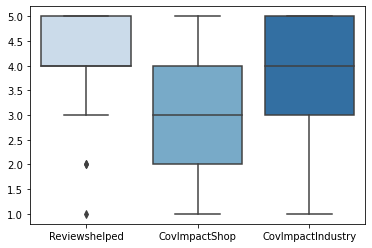

In [4]:
sns.boxplot(data=df,palette='Blues')

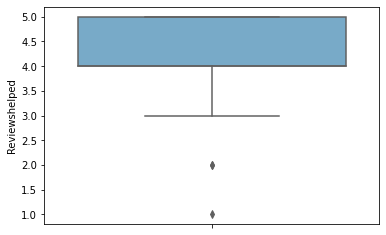

In [5]:
ax = sns.boxplot(y=df["Reviewshelped"],palette='Blues')

In [6]:
df.head()

,Age,Occupation,Gender,Platform preferred,Frequency (shopping),Onlinebrandspurchase,Purchasedoninsta,Socmediainfluencepurchase,Givenreview,Reviewshelped,CovImpactShop,CovImpactIndustry
0,18-24,Student,Female,Nykaa Fashion,Once a month,Yes,Yes,Yes,Yes,4,4,4
1,18-24,Student,Female,Myntra,Once a month,Yes,No,No,Yes,5,4,4
2,18-24,Student,Male,Amazon,A few times a month,Yes,No,No,No,4,3,3
3,18-24,Student,Female,Nykaa Fashion,Once a month,Yes,Yes,No,Yes,4,3,3
4,18-24,Student,Female,Ajio,Once a month,Yes,No,Yes,Yes,5,2,4


In [7]:
df.describe()

,Reviewshelped,CovImpactShop,CovImpactIndustry
count,107.000000,107.000000,107.000000
mean,4.196262,3.056075,3.785047
std,0.873501,1.147859,1.028170
min,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000
50%,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000


In [8]:
df.Reviewshelped.describe()

count    107.000000
mean       4.196262
std        0.873501
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Reviewshelped, dtype: float64

In [9]:
q1 = df['Reviewshelped'].quantile(0.25)
q3 = df['Reviewshelped'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr  #acceptable range
upper_limit  =  q3+1.5*iqr #acceptable range

In [10]:
upper_limit

6.5

## Winsorizing Technique

In [11]:
df['Reviewshelped']=np.where(df['Reviewshelped'] > upper_limit,upper_limit,df['Reviewshelped']) # upper limit

In [12]:
df['Reviewshelped']=np.where(df['Reviewshelped'] < Lower_limit,Lower_limit,df['Reviewshelped'])  # lower limit

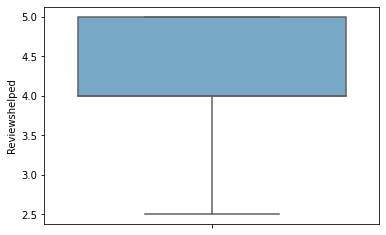

In [13]:
ax1 = sns.boxplot(y=df["Reviewshelped"],palette='Blues')  # for horizontal use x instead of y 

## 1) Two Independent Sample T-test

In [14]:
df1 = df[['Gender','Reviewshelped']]
df1.head()

,Gender,Reviewshelped
0,Female,4.0
1,Female,5.0
2,Male,4.0
3,Female,4.0
4,Female,5.0


In [15]:
df1.describe()

,Reviewshelped
count,107.000000
mean,4.219626
std,0.810246
min,2.500000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [16]:
Men = df1[(df1['Gender'] == 'Male')]
Men.reset_index(inplace= True)

Women = df1[(df1['Gender'] == 'Female')]
Women.reset_index(inplace= True)

In [17]:
twosample_results1 = scipy.stats.ttest_ind(Men['Reviewshelped'],Women['Reviewshelped'])
twosample_results1

Ttest_indResult(statistic=-2.758198011404251, pvalue=0.006857209939918174)

## Hypothesis
* H0: There is no significant difference between how much impact online reviews had on males and females. (μ=M)

* H1: There is a significant difference between how much impact online reviews had on males and females. (μ≠M)

## Conclusion
* There is a significant difference between how much impact online reviews had on males and females. (μ≠M)


## 2) Two Independent Sample T-test

In [18]:
df2 = df[['Gender','CovImpactShop']]
df2.head()

,Gender,CovImpactShop
0,Female,4
1,Female,4
2,Male,3
3,Female,3
4,Female,2


In [19]:
Men = df2[(df2['Gender'] == 'Male')]
Men.reset_index(inplace= True)

Women = df2[(df2['Gender'] == 'Female')]
Women.reset_index(inplace= True)

In [20]:
twosample_results2 = scipy.stats.ttest_ind(Men['CovImpactShop'],Women['CovImpactShop'])
twosample_results2

Ttest_indResult(statistic=-2.5305216557873385, pvalue=0.012872952023745438)

## Hypothesis
* H0: There is no significant difference between males and females with respect to the impact covid-19 has had on online shopping trends.  (μ=M)

* H1: There is a significant difference between males and females with respect to the impact covid-19 has had on online shopping trends. (μ≠M)

## Conclusion
* There is a significant difference between males and females with respect to the impact covid-19 has had on online shopping trends. (μ≠M)

## 3) Two Independent Sample T-test

In [21]:
df3 = df[['Gender','CovImpactIndustry']]
df3.head()

,Gender,CovImpactIndustry
0,Female,4
1,Female,4
2,Male,3
3,Female,3
4,Female,4


In [22]:
Men = df3[(df3['Gender'] == 'Male')]
Men.reset_index(inplace= True)

Women = df3[(df3['Gender'] == 'Female')]
Women.reset_index(inplace= True)

In [23]:
twosample_results3 = scipy.stats.ttest_ind(Men['CovImpactIndustry'],Women['CovImpactIndustry'])
twosample_results3

Ttest_indResult(statistic=-1.2535166563369702, pvalue=0.21280169056562478)

## Hypothesis
* H0:  There is no significant difference in the views of men and women on - the impact covid-19 has had on the fashion industry. (μ=M)

* H1:  There is a significant difference in the views of men and women on - the impact covid-19 has had on the fashion industry. (μ≠M)

## Conclusion
* There is no significant difference in the views of men and women on - the impact covid-19 has had on the fashion industry. (μ=M)

## 4) Chi-square Test of Independence

In [24]:
df4 = df[['Gender','Socmediainfluencepurchase']]
df4.head()

,Gender,Socmediainfluencepurchase
0,Female,Yes
1,Female,No
2,Male,No
3,Female,No
4,Female,Yes


In [25]:
df4.columns

Index(['Gender', 'Socmediainfluencepurchase'], dtype='object')

In [26]:
df4.Gender.value_counts()

Female    82
Male      25
Name: Gender, dtype: int64

In [27]:
table, results = rp.crosstab(df4['Gender'], df4['Socmediainfluencepurchase'], test= 'chi-square') #,prop='row')
table

Socmediainfluencepurchase         
Socmediainfluencepurchase                        No Yes  All
Gender                                                      
Female                                           47  35   82
Male                                             14  11   25
All                                              61  46  107

In [28]:
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.0136
1,p-value =,0.9073
2,Cramer's phi =,0.0113


## Hypothesis
* H0: There is no relationship between the gender and how much social media influencers have influenced the purchase of apparel. 

* H1: There is a relationship between the gender and how much social media influencers have influenced the purchase of apparel. 

## Conclusion
* There is no relationship between the gender and how much social media influencers have influenced the purchase of apparel.

## One - Way Anova 

In [29]:
ano = pg.anova(data=df,dv = 'CovImpactShop', between = 'Gender',detailed = True)

In [30]:
ano

,Source,SS,DF,MS,F,p-unc,np2
0,Gender,8.027942,1,8.027942,6.40354,0.012873,0.057481
1,Within,131.635610,105,1.253672,NaN,NaN,NaN


## Hypothesis
* H0: There is no significant difference between males and females with respect to the impact covid-19 has had on online shopping trends.
* H1: There is a significant difference between males and females with respect to the impact covid-19 has had on online shopping trends.

In [31]:
stats.f_oneway(df['CovImpactShop'][df['Gender'] == 'Male'],
              df['CovImpactShop'][df['Gender'] == 'Female'])

F_onewayResult(statistic=6.403539850408693, pvalue=0.012872952023745426)

## Conclusion
* There is a significant difference between males and females with respect to the impact covid-19 has had on online shopping trends.